# Práctica Tema 4: Aprendizaje automático

### Grupo: 10
### Miembros: Gonzalo Figueroa del Val, Miguel Robledo Casal y Guillermo Calvo Suárez

## Sistemas Inteligentes 

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. 

Los ejercicios propuestos se resolverán en este mismo notebook que se entregara en la tarea de entrega habilitada en el Campus  Virtual.

__Lo primero que tenéis que hacer es ejecutar los notebooks para familiarizados con las librerías numpy, pandas y sklearn y con los procesos de carga, análisis y visualización de datos__

En esta práctica se os pide replicar estos procesos C, construir modelos con otros datos. Lo más importante en esta práctica es el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No cuenta para nada poner los trozos de código o gráficas sin explicación__.

Para que los resultados no varíen entre distintas ejecuciones recuerda establecer el parámetro `random_state` para que tenga el mismo valor en todas las funciones que tomen decisiones aleatorias.

__Número de grupo: 10__

__Nombres de los estudiantes: Gonzalo Figueroa del Val, Miguel Robledo Casal y Guillermo Calvo Suárez__

# Parte 1: Clustering

In [6]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países indicando index_col=0 al leer el archivo csv. 
Echa un vistazo a los datos, verás que todos los datos son numéricos menos la Región. Elimina con la operación drop la columna `Region` por ser categórica. 
Elimina todas las filas en las que faltan valores usando la operación `dropna`.
Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [185]:
import pandas as pd
#Fichero countries_of_the_world.csv #Indice nombre de los paises indicando index_col=0 al leer csv
df = pd.read_csv("countries_of_the_world.csv", sep=',', index_col=0)

#Eliminar la columna Region con drop por ser categorica
df = df.drop(['Region'], axis=1)

#Eliminar filas en las que faltan valores usando dropna
df = df.dropna()

#Mostrar dataframe y explicar cuantos paises y variables contiene
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


### Análisis 1)

El dataframe final contiene información de 179 países. De cada uno de los países tenemos 18 variables diferentes entre las que están la población, la densidad de población y el número de teléfonos por cada 1000 habitantes, además de otras.

# ------------------------------------------------------------------------------------------------------------

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...). 

Utiliza describe() para calcular los estadísticos, corr() para calcular los coeficientes de correlación y la librería seaborn para dibujar (pairplot) el diagrama de dispersión (tipo kde)


Distribuciones: 

       GDP ($ per capita)  Literacy (%)  Phones (per 1000)  Agriculture  \
count          179.000000    179.000000         179.000000   179.000000   
mean          9125.698324     81.944134         208.151955     0.156905   
std           9644.123141     19.837537         210.121875     0.151343   
min            500.000000     17.600000           0.200000     0.000000   
25%           1800.000000     69.950000          27.100000     0.039000   
50%           5100.000000     90.900000         137.100000     0.101000   
75%          12950.000000     97.800000         335.000000     0.233000   
max          37800.000000    100.000000         898.000000     0.769000   

         Industry     Service  
count  179.000000  179.000000  
mean     0.288028    0.554508  
std      0.140310    0.165670  
min      0.032000    0.062000  
25%      0.197000    0.424500  
50%      0.274000    0.559000  
75%      0.349000    0.668500  
max      0.906000    0.954000  

Coeficientes de 

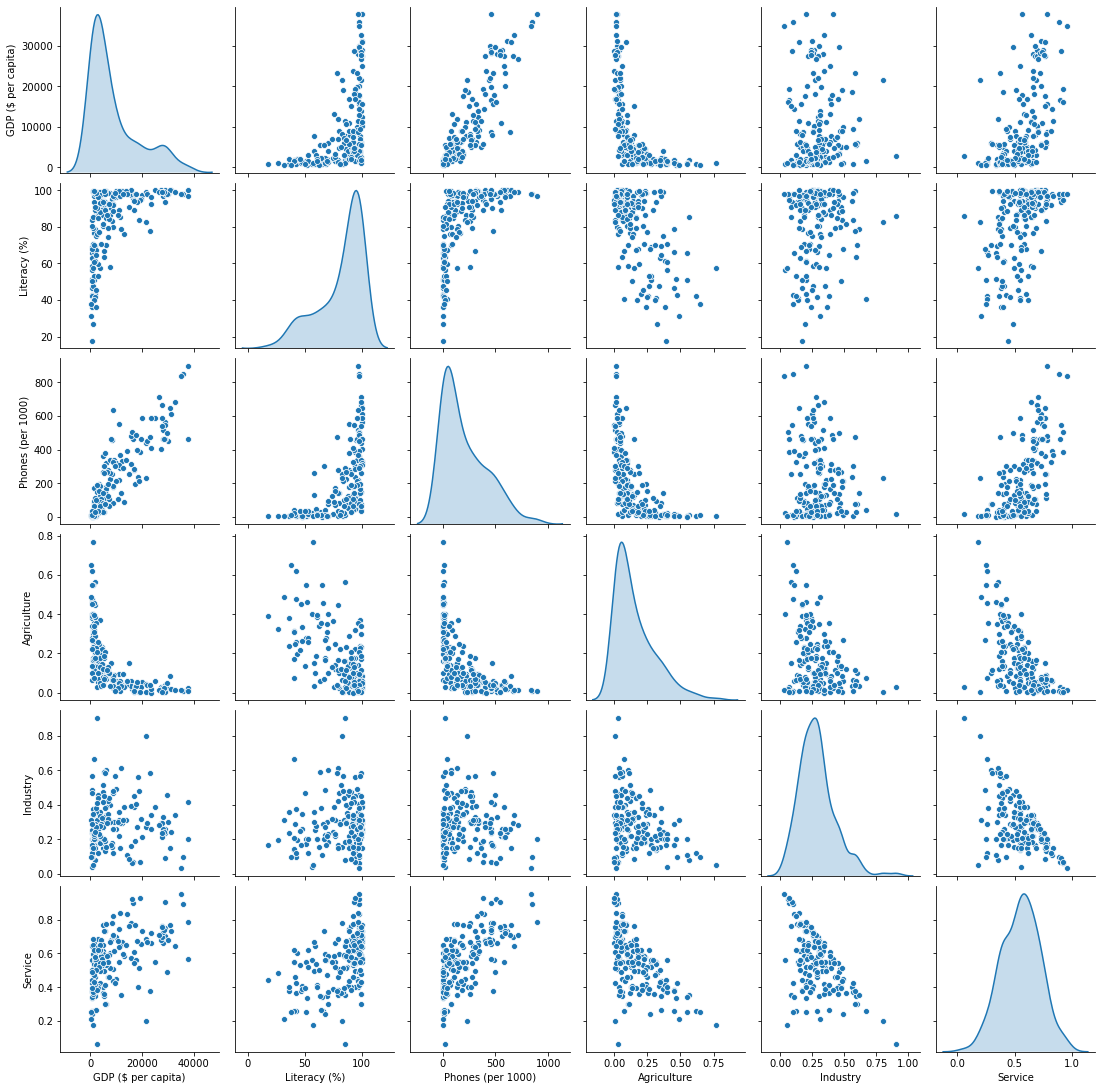

In [186]:
import seaborn
#Data frame con las variables especificadas

df2 = df.loc[:,["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Agriculture", "Industry", "Service" ]]

#Estadísticos
out1 = df2.describe()

#Coeficientes de correlación
out2 = df2.corr(method='pearson')

#Diagrama de dispersión
graf = seaborn.pairplot(df2, diag_kind='kde')

print("\nDistribuciones: \n")
print(out1)

print("\nCoeficientes de correlación: \n")
print(out2)


print("\nDiagrama de dispersión: \n")
print(graf)

### Análisis 2)

#### Primer análisis 

En primer lugar, se podría decir que las variables seleccionadas representan los pilares de un país. GDP representando su economía (producto interior bruto), Literacy (alfabetización) representando la educación, Phones (per 1000) da una imagen del avance tecnológico y modernización, y luego Agriculture, Industry y Services al reparto de los 3 principales sectores económicos (primario, secundario y terciario)

#### Distribuciones

En cuanto al GDP (producto interior bruto):
- La media de todos los países se encuentra en 9125. El país con menor GDP tiene 500 y el que más tiene son 37800
El país más analfabeto tiene tan solo un 17'6% de alfabetización, además, suponemos por las relaciones estudiadas después, que se tratará también de un país con pocos teléfonos (poca tecnología) y quizá un alto peso del sector primario (agricultura)

#### Correlaciones

Observando la tabla de correlaciones, sabemos que los valores más próximos a 1 representan una fuerte correlación directa y los más próximos a -1 una fuerte correlación inversa, sabiendo que los valores próximos a 0 representan una correlación débil entre las variables. Con esto, algunas de las conclusiones que podemos sacar son las siguientes:
- Existe una fuerte relación directa entre el producto interior bruto y la posesión de teléfonos móviles, dando lugar a que cuanto mayor sea el GDP, más teléfonos móviles por cada 1000 habitantes encontraremos.
- La correlación con la variable Agriculture siempre es negativa (< 0), lo que nos indica que cuanto mayor sea el sector primario, menor será el producto interior bruto, existirá más analfabetización y habrá menos teléfonos móviles (menor tecnologización)
- De los tres sectores económicos, el que más aumenta el GDP es el sector servicios, encontrando que el sector primario (Agriculture) lo disminuye y el sector secundario (Industry) tiene una relación muy débil (próxima a 0)

#### Diagrama de dispersión



# ------------------------------------------------------------------------------------------------------------

## 3) Preprocesar los datos

Vamos a utilizar los algoritmos jerárquico aglomerativo y k-Means para encontrar grupos de países similares. 
k-means es muy sensible a las escalas, por lo que vamos a ajustar las escalas de los datos conMinMaxScaler. No procede la estandarizarlos (StandarScaler) porque no siguen distribuciones normales. 
Para ello accedemos al array interno del dataframe y creamos un nuevo array con los datos escalados que será el que utilizaremos en los algoritmos de clustering. 

In [187]:
# Esta parte os la doy hecho. Ejecutarlo con el dataframe df con los datos. 

from sklearn.preprocessing import MinMaxScaler

# Reescalamos los datos para no cambiar su distribución original (que no es normal)
scaler = MinMaxScaler()
data = df2.values
# data y data_scaled son array de numpy.
data_scaled = scaler.fit_transform(data)

data_scaled

array([[0.00536193, 0.22330097, 0.0033415 , 0.49414824, 0.23798627,
        0.35650224],
       [0.10723861, 0.83616505, 0.0790822 , 0.30169051, 0.1784897 ,
        0.57959641],
       [0.14745308, 0.63592233, 0.08676765, 0.1313394 , 0.64988558,
        0.26457399],
       ...,
       [0.0080429 , 0.39563107, 0.04121185, 0.17555267, 0.50343249,
        0.37107623],
       [0.0080429 , 0.76456311, 0.00891067, 0.28608583, 0.29519451,
        0.47869955],
       [0.03753351, 0.88713592, 0.02962798, 0.23276983, 0.24141876,
        0.57959641]])

###  Aplicamos los algoritmos de clustering con una configuración sin optimizar

In [188]:
# Podeis usar la siguiiente función plot_clusters para dibujar los clusters. 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

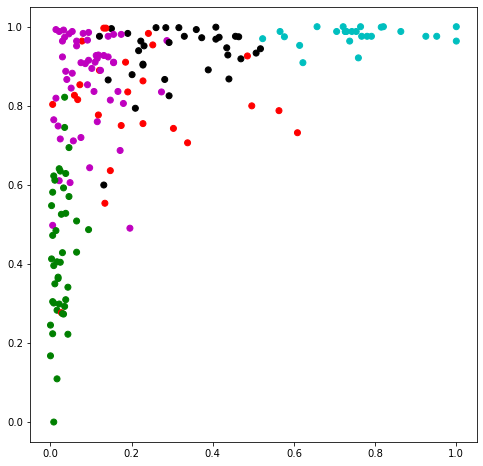

In [189]:
#USANDO KMEANS
from sklearn.cluster import KMeans

km = KMeans(init='random', n_clusters=5, random_state=RANDOM_STATE)

km.fit(data_scaled)

labels = km.labels_
centers = km.cluster_centers_

plot_clusters(data_scaled, labels)

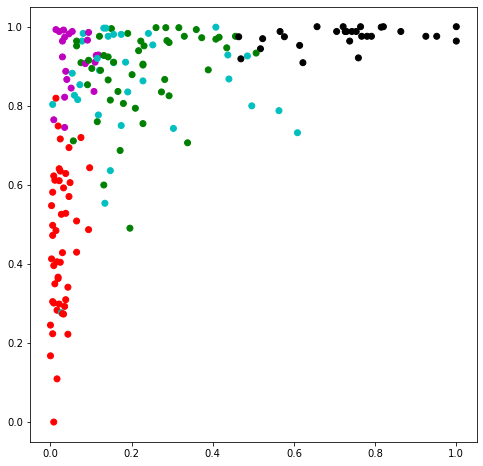

In [163]:
#USANDO JERÁRQUICO AGLOMERATIVO
from sklearn.cluster import AgglomerativeClustering

# Crear una instancia del agrupador jerárquico aglomerativo
# A diferencia del algoritmo que hemos visto en clase, esta implementación sí recibe el 
# número de clusters que debe crear.
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')

# Agrupar los puntos en clusters
ag.fit(data_scaled)

# Podemos consultar el cluster asignado a cada punto
labels = ag.labels_

plot_clusters(data_scaled, labels)

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

Después de aplicar clustering con numero de clusters=5, al visualizar con plot_clusters() obtendrás algo como esto:
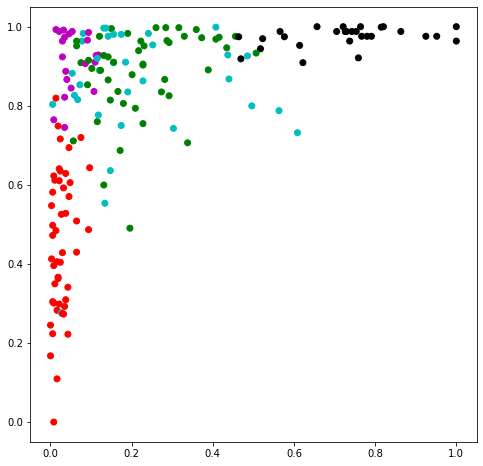

## 4) Encontrar el número óptimo de clusters

Como el número de clusters es un parámetro de entrada queremos decidir __razonadamente__ el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters. 

¿Qué número de clusters sería el óptimo según los diagramas anteriores?  RAZONA LA RESPUESTA.


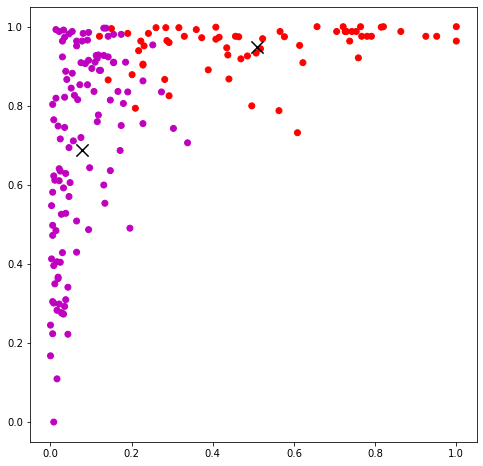

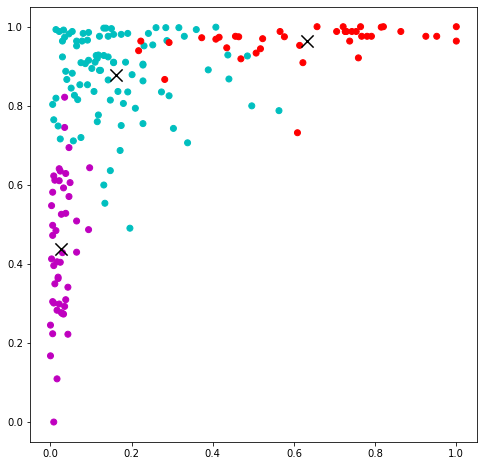

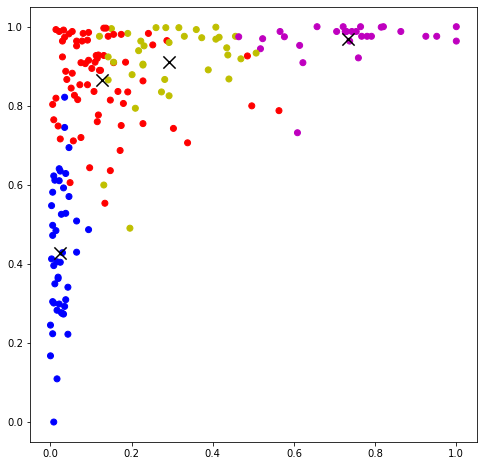

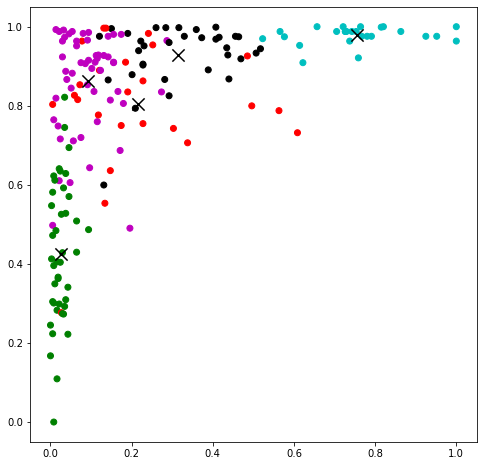

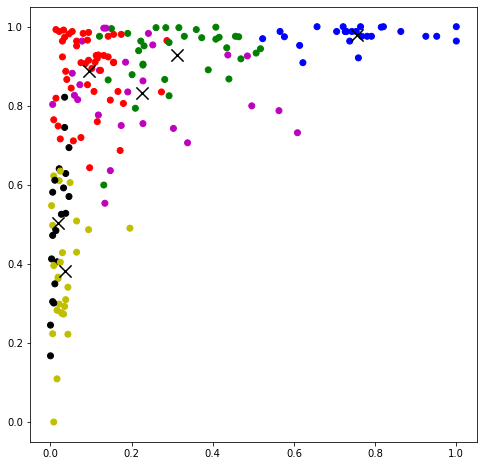

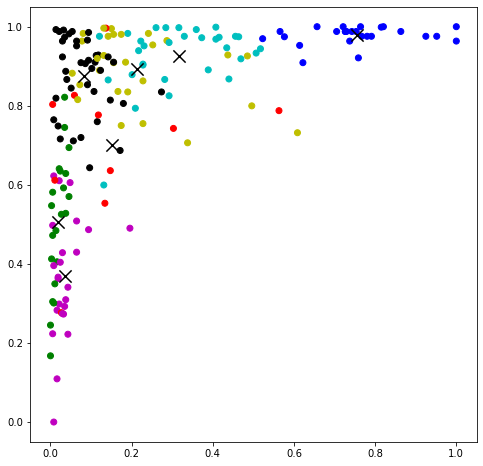

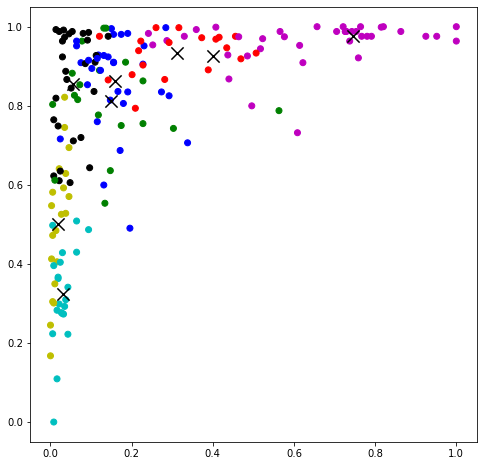

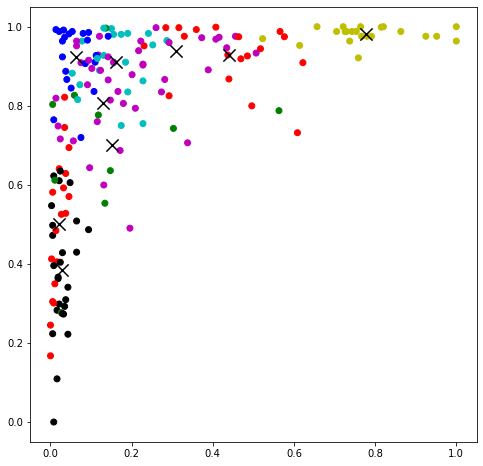

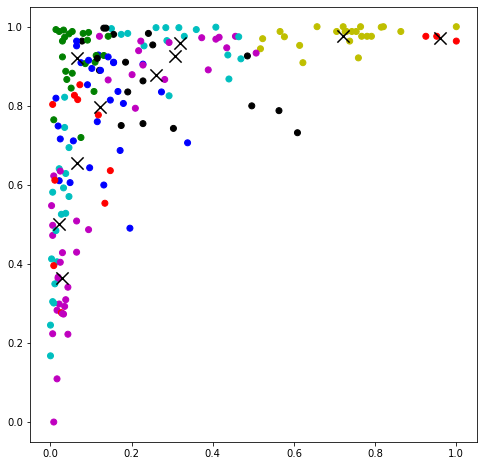

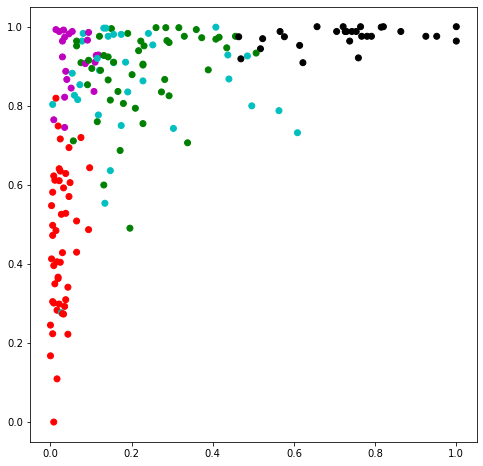

In [190]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

K_MAX=11
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    km = KMeans(init="random", n_clusters=k, random_state=RANDOM_STATE)
    km.fit(data_scaled)
    plot_clusters(data_scaled, km.labels_, km.cluster_centers_)
    
    score[k-2] = -1*km.score(data_scaled)
    davies_boulding[k-2] = davies_bouldin_score(data_scaled, km.labels_)

    
    ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')

# Agrupar los puntos en clusters
ag.fit(data_scaled)

# Podemos consultar el cluster asignado a cada punto
labels = ag.labels_

plot_clusters(data_scaled, labels)

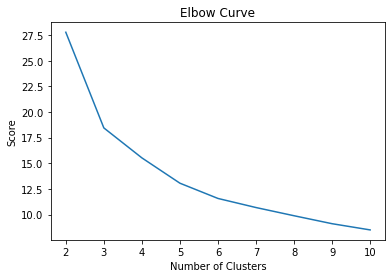

In [191]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

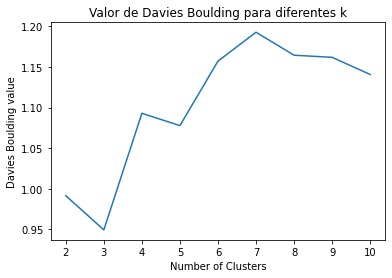

In [192]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

### Análisis KMeans

Primero se pueden observar las gráficas generadas para los valores de clusters entre 2 y 10, con esto, se ha realizado el diagrama de codo y el diagrama de índice Davies Boulding.

#### Diagrama de codo

En el diagrama de codo hay que buscar el valor de K en el que la curva deje de descender bruscamente y empiece a estabilizarse. En este caso, encontramos 2 puntos de inflexión más marcados, K=3 y K=5 pero predomina K=3

#### Diagrama Davies Boulding

Este diagrama representa la razón entre las distancias intra-cluster y las distancias inter-cluster. Cuanto más compactos y separados estén los clusters nos ofrecerá un valor más pequeño, que es lo que buscamos. Con esto, El número más bajo es con mucha diferencia K=3

#### Conclusión

Observando ambos diagramas, determinamos que el número más adecuado de clusters es 3

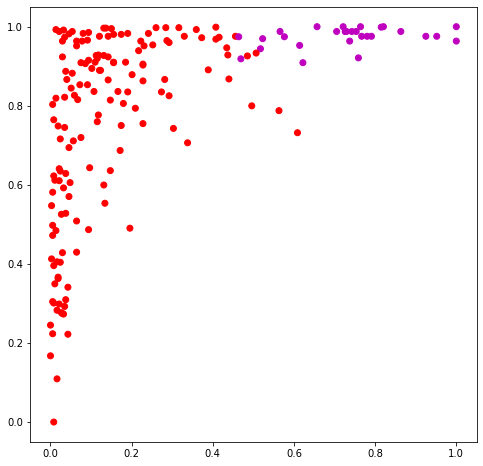

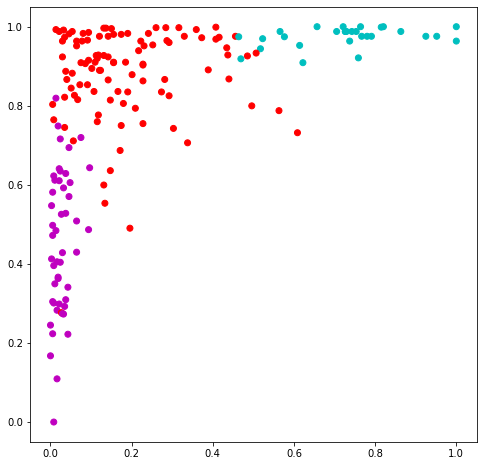

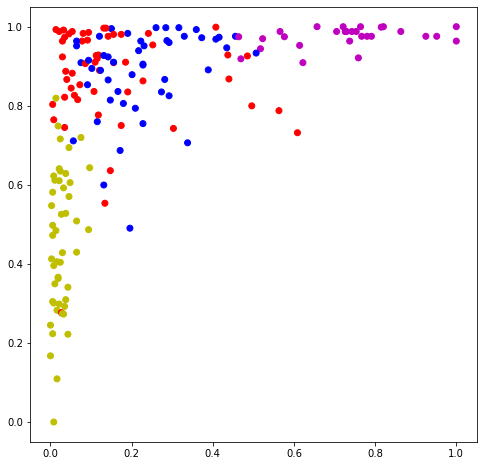

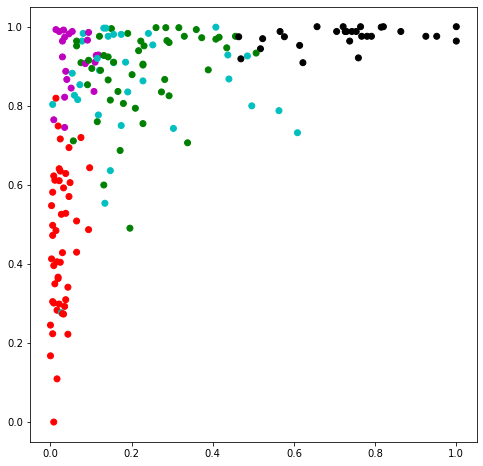

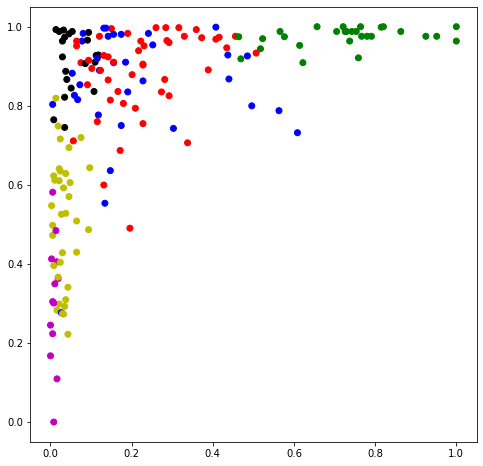

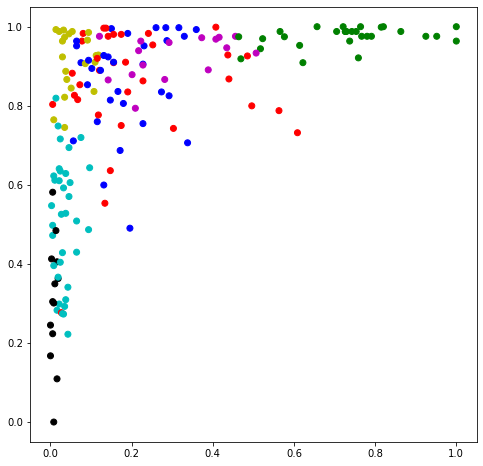

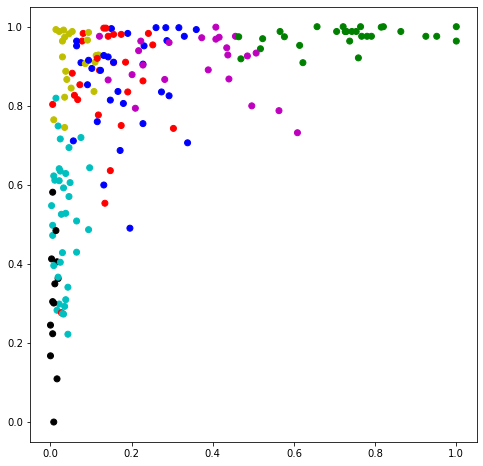

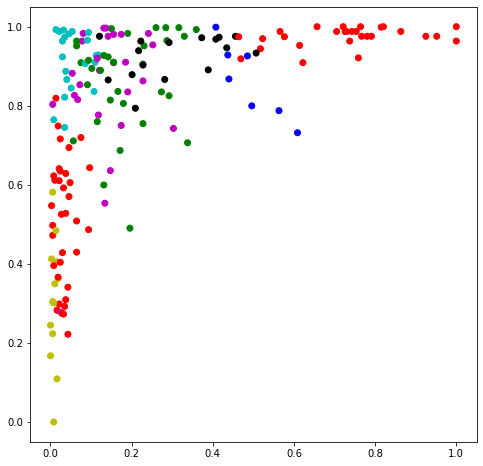

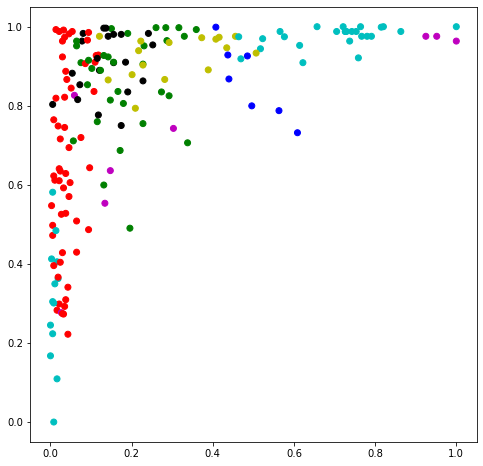

In [164]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

K_MAX=11
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag.fit(data_scaled)
    plot_clusters(data_scaled, ag.labels_)
    
    davies_boulding[k-2] = davies_bouldin_score(data_scaled, ag.labels_)

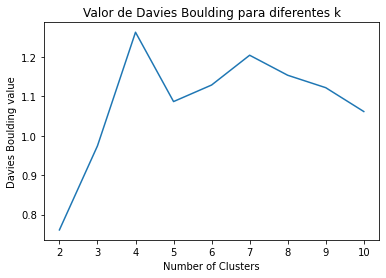

In [165]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

### Análisis jerárquico aglomerativo

#### Diagrama Davies Boulding

Este diagrama representa la razón entre las distancias intra-cluster y las distancias inter-cluster. Cuanto más compactos y separados estén los clusters nos ofrecerá un valor más pequeño, que es lo que buscamos. Con esto, El número más bajo es con mucha diferencia K=2

#### Conclusión

Determinamos que el número más adecuado de clusters para el algoritmo jerárquico aglomerativo es 2

# ------------------------------------------------------------------------------------------------------------

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Estudia al menos uno de los clusters a través de sus descriptores estadísticos.
Pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. 
Como al principio hemos escalado los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. 
creamos una nueva columna para añadir la clase que le ha asignado el algoritmo a cada fila de la tabla de la siguiente forma:

    df = df.copy()
    df['cluster'] = km.labels_

In [193]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(data_scaled)

centers = km.cluster_centers_
centers

array([[0.6325067 , 0.96256068, 0.59030129, 0.03569571, 0.24439359,
        0.74515135],
       [0.16149901, 0.87767782, 0.1843625 , 0.15511393, 0.34652025,
        0.54128485],
       [0.02629628, 0.4367641 , 0.0188783 , 0.44307335, 0.22936852,
        0.40912127]])

### Análisis

En la celda anterior se pueden ver las coordenadas de cada uno de los 3 centros en las 6 dimensiones estudiadas

In [194]:
# crear data frame con los puntos originales
df3 = pd.DataFrame(data=data, columns=["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Agriculture", "Industry", "Service" ])
# añadir una columna con el cluster al que pertenece cada punto
df3 = df3.assign(cluster=pd.Series(data=km.labels_))
df3

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
0,700.0,36.0,3.2,0.380,0.240,0.380,2
1,4500.0,86.5,71.2,0.232,0.188,0.579,1
2,6000.0,70.0,78.1,0.101,0.600,0.298,1
3,8600.0,95.0,460.0,0.040,0.180,0.780,0
4,11000.0,89.0,549.9,0.038,0.220,0.743,0
...,...,...,...,...,...,...,...
174,4800.0,93.4,140.1,0.040,0.419,0.541,1
175,2500.0,90.3,187.7,0.209,0.410,0.381,1
176,800.0,50.2,37.2,0.135,0.472,0.393,2
177,800.0,80.6,8.2,0.220,0.290,0.489,1


### Análisis

La celda anterior muestra el dataframe con la asignación correspondiente de cluster a cada muestra

In [195]:
df3.groupby(["cluster"]).describe().transpose()

cluster                              0             1            2
GDP ($ per capita) count     40.000000     92.000000    47.000000
                   mean   24092.500000   6523.913043  1480.851064
                   std     7732.893030   4524.690981   816.311508
                   min     8600.000000    700.000000   500.000000
                   25%    17950.000000   3275.000000   800.000000
                   50%    25900.000000   5450.000000  1300.000000
                   75%    29025.000000   9000.000000  1850.000000
                   max    37800.000000  21500.000000  4100.000000
Literacy (%)       count     40.000000     92.000000    47.000000
                   mean      96.915000     89.920652    53.589362
                   std        3.872821      8.884504    14.501683
                   min       77.900000     58.000000    17.600000
                   25%       96.550000     85.025000    42.300000
                   50%       97.950000     92.250000    52.900000
                   75%       99.000000     97.350000    65.950000
                   max      100.000000     99.900000    85.300000
Phones (per 1000)  count     40.000000     92.000000    47.000000
                   mean     530.172500    165.720652    17.148936
                   std      138.167347    107.955035    23.621378
                   min      194.500000      3.700000     0.200000
                   25%      458.375000     75.075000     3.600000
                   50%      493.300000    141.500000     9.700000
                   75%      590.025000    260.525000    19.550000
                   max      898.000000    463.800000   131.800000
Agriculture        count     40.000000     92.000000    47.000000
                   mean       0.027450      0.119283     0.340723
                   std        0.019916      0.084219     0.149452
                   min        0.000000      0.002000     0.073000
                   25%        0.010750      0.058000     0.243500
                   50%        0.021500      0.099500     0.322000
                   75%        0.040000      0.164000     0.424500
                   max        0.086000      0.370000     0.769000
Industry           count     40.000000     92.000000    47.000000
                   mean       0.245600      0.334859     0.232468
                   std        0.115622      0.145356     0.118078
                   min        0.032000      0.088000     0.040000
                   25%        0.175000      0.229750     0.167500
                   50%        0.252000      0.311000     0.204000
                   75%        0.298000      0.412250     0.281500
                   max        0.585000      0.906000     0.666000
Service            count     40.000000     92.000000    47.000000
                   mean       0.726675      0.544826     0.426936
                   std        0.119561      0.134877     0.124527
                   min        0.375000      0.062000     0.177000
                   25%        0.671000      0.445000     0.351500
                   50%        0.729000      0.551500     0.406000
                   75%        0.780000      0.640750     0.542000
                   max        0.954000      0.818000     0.643000

### Análisis 

Observando los datos de cada cluster en la tabla anterior, podemos determinar fácilmente que el cluster 0 agrupa los países más ricos, con mayor GDP, mayor presencia del sector terciario, mayor alfabetismo y uso de tecnologías (teléfonos por cada 1000 habitantes)

Así, el cluster 2 hace referencia a los países más pobres o a los que no lo son tanto pero están muy dedicados a la agricultura, donde el sector terciario ocupa menos del 50%, la agricultura tiene mucha presencia, el analfabetismo es alto y el GDP es menor

Por tanto esto nos deja con que el cluster 1 agrupa a los países con una economía "media", donde predomina el sector servicios pero poco más del 50%, hay un GDP que llega a alcanzar valores altos en algunos países y existe una alta tasa de alfabetización

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDP ($ per capita), dtype: object

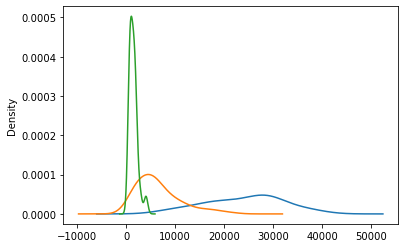

In [196]:
#Distribución de la variable GDP en cada cluster
df3.groupby(["cluster"])["GDP ($ per capita)"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Literacy (%), dtype: object

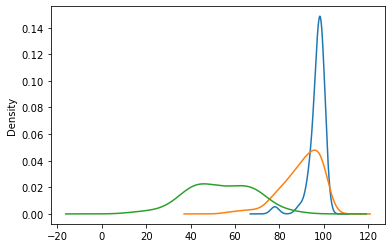

In [206]:
#Distribución de la variable Literacy en cada cluster
df3.groupby(["cluster"])["Literacy (%)"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Phones (per 1000), dtype: object

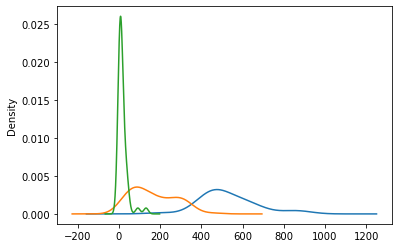

In [199]:
#Distribución de la variable Phones en cada cluster
df3.groupby(["cluster"])["Phones (per 1000)"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Agriculture, dtype: object

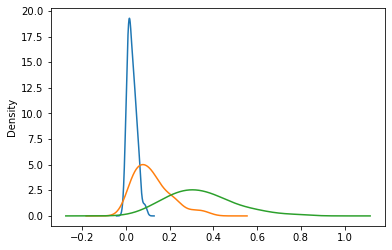

In [197]:
#Distribución de la variable Agriculture en cada cluster
df3.groupby(["cluster"])["Agriculture"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Industry, dtype: object

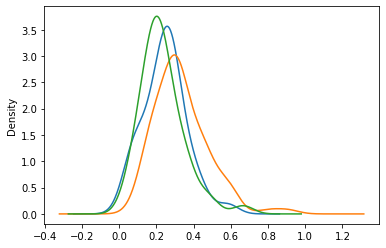

In [201]:
#Distribución de la variable Industry en cada cluster
df3.groupby(["cluster"])["Industry"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Service, dtype: object

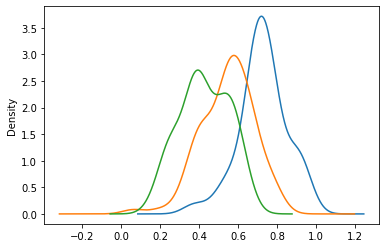

In [200]:
#Distribución de la variable Service en cada cluster
df3.groupby(["cluster"])["Service"].plot.density()

### Análisis

En las gráficas anteriores se puede observar la distribución de cada variable en cada cluster (representado cada uno con un color).

Se puede ver como la industrialización es similar en los 3, no hay grandes diferencias, al contrario que en variables como el GDP, la posesión de teléfonos móviles o la presencia de la agricultura.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000228BAC1A8B0>,
      dtype=object)

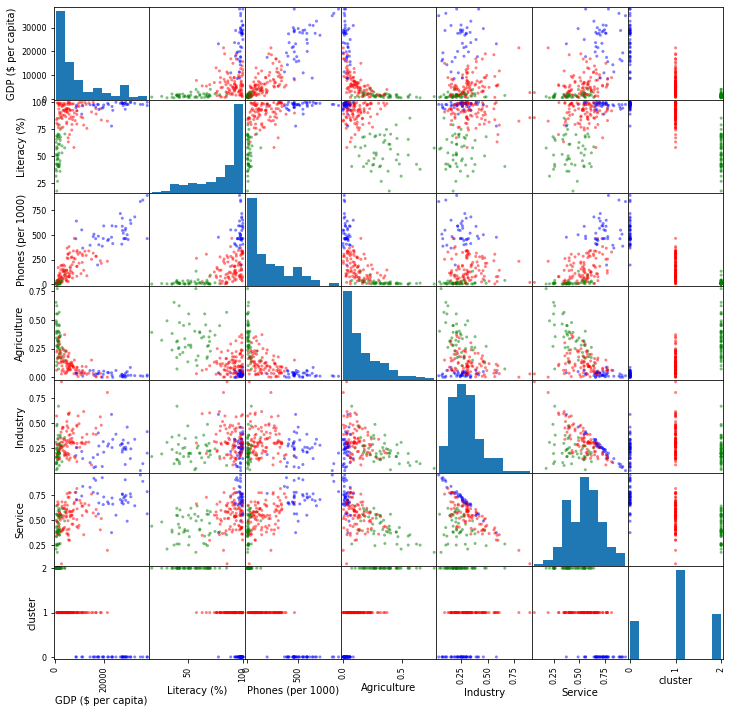

In [208]:
from pandas.plotting import scatter_matrix

dic_colors = { 0: 'blue', 1: 'red', 2: 'green' }
colors = df3['cluster'].map(dic_colors)

scatter_matrix(df3, figsize = (12, 12), diagonal = 'hist', color=colors)

### Análisis

La imagen anterior  muestra la matriz de diagramas de dispersión, con un diagrama para cada par de variables y la representación de cada muestra con el color del cluster al que pertenece siendo azul el cluster 0, rojo el cluster 1 y verde el cluster 2.

Los clusters que se separan mejor son el 0 y el 2 en función de variables como el GDP, Literacy (alfabetización), Phones y Agriculture.

Entre clusters más próximos (0 y 1 o 1 y 2) existe cierta confusión ya que en el cluster 1 existen valores que podrían pertenecer a 0 y valores que podrían pertenecer a 2. Esto se puede observar además en variables como la industrialización (Industry), la presencia del sector terciario (Service) para la confusión entre el cluster 1 y el cluster 2 y en Literacy (alfabetización) para la confusión entre el cluster 1 y el 0

# --------------------------------------------------------------------

# Parte 2: Clasificación

Para esta segunda parte vamos a usar un conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.


In [2]:
import pandas as pd

df = pd.read_csv("cleveland.csv", sep=',')

#Variables categoricas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['thal'] = df['thal'].astype('category')
df['ca'] = df['ca'].astype('category')

#Editar columna para diferenciar solo entre normal y enfermo
df['target'] = df['target'].map({0: 'normal', 1: 'enfermo', 2: 'enfermo', 3: 'enfermo', 4: 'enfermo'})

#Eliminar filas en las que faltan valores usando dropna
df = df.dropna()

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?


Distribuciones: 

              age    trestbps        chol     thalach     oldpeak
count  297.000000  297.000000  297.000000  297.000000  297.000000
mean    54.542088  131.693603  247.350168  149.599327    1.055556
std      9.049736   17.762806   51.997583   22.941562    1.166123
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.000000    0.000000
50%     56.000000  130.000000  243.000000  153.000000    0.800000
75%     61.000000  140.000000  276.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

Coeficientes de correlación: 

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.290476  0.202644 -0.394563  0.197123
trestbps  0.290476  1.000000  0.131536 -0.049108  0.191243
chol      0.202644  0.131536  1.000000 -0.000075  0.038596
thalach  -0.394563 -0.049108 -0.000075  1.000000 -0.347640
oldpeak   0.197123  0.191243  0.038596 -0.347640  1.000000



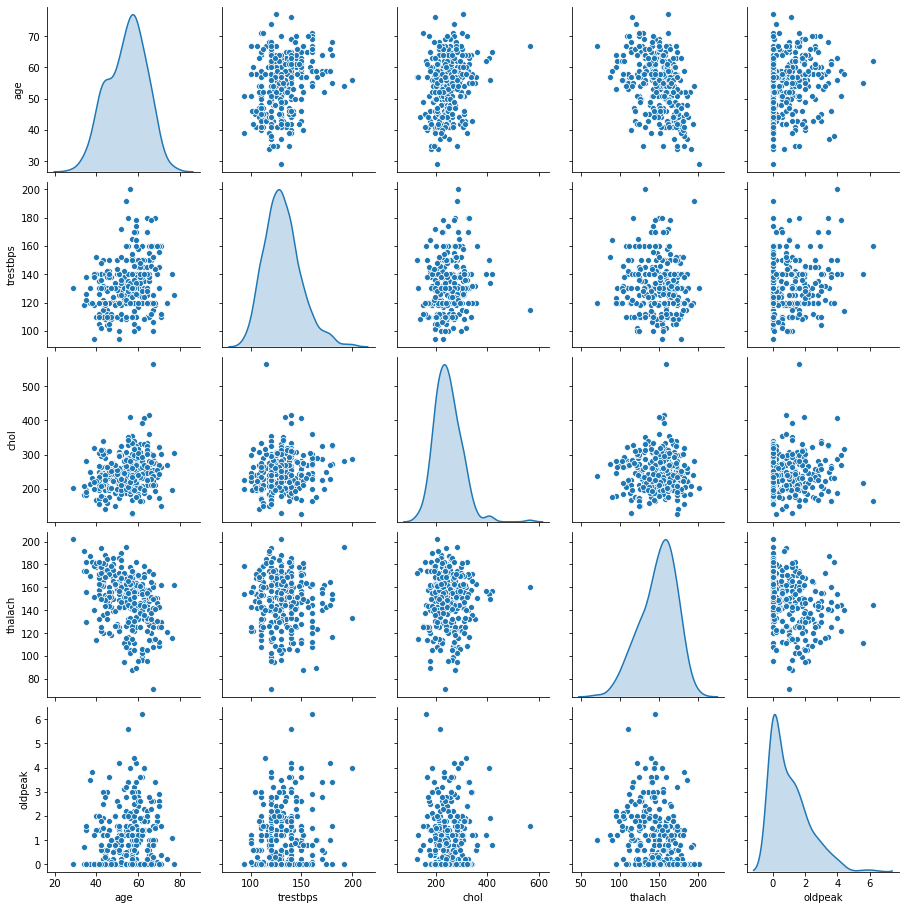

In [3]:
import seaborn

#Estadísticos
out1 = df.describe()

#Coeficientes de correlación
out2 = df.corr(method='pearson')

#Diagrama de dispersión con las variables numéricas
df2 = df.loc[:,["age", "trestbps", "chol", "thalach", "oldpeak"]]
graf = seaborn.pairplot(df2, diag_kind='kde')

print("\nDistribuciones: \n")
print(out1)

print("\nCoeficientes de correlación: \n")
print(out2)

print("\nDiagrama de dispersión: \n")
print(graf)

In [4]:
#Creación de un dataframe sólo con variables numéricas

df3 = df.copy()
df3 = df3.drop(['sex'], axis=1)
df3 = df3.drop(['cp'], axis=1)
df3 = df3.drop(['fbs'], axis=1)
df3 = df3.drop(['restecg'], axis=1)
df3 = df3.drop(['exang'], axis=1)
df3 = df3.drop(['slope'], axis=1)
df3 = df3.drop(['ca'], axis=1)
df3 = df3.drop(['thal'], axis=1)
df3

,age,trestbps,chol,thalach,oldpeak,target
0,63.0,145.0,233.0,150.0,2.3,normal
1,67.0,160.0,286.0,108.0,1.5,enfermo
2,67.0,120.0,229.0,129.0,2.6,enfermo
3,37.0,130.0,250.0,187.0,3.5,normal
4,41.0,130.0,204.0,172.0,1.4,normal
...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,enfermo
298,45.0,110.0,264.0,132.0,1.2,enfermo
299,68.0,144.0,193.0,141.0,3.4,enfermo
300,57.0,130.0,131.0,115.0,1.2,enfermo


### Análisis

Un problema difícil de resolver ya que el coeficiente de correlación con un valor más próximo a 1 (o a -1) es -0.394563 correspondiente a la correlación entre age y thalach, seguido de -0.347640 correspondiente a oldpeak y thalach

Con esto sabemos que las correlaciones entre variables no son muy fuertes, por lo que el problema será difícil de resolver

## 3) Crea el modelo de árbol de decisión con profundidad 3

Si se construye el árbol completo se puede producir sobreaprendizaje. 
Aunque no lo vamos a hacer, podemos calcular con validación cruzada cual es la profundidad óptima.
Entrenando y validandos varios árboles con distintas profundidades máximas

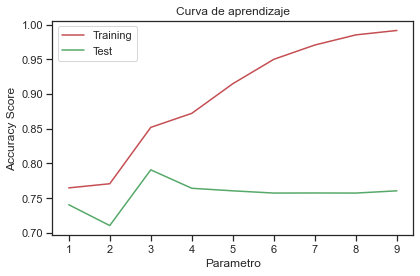
En el gráfico se ve que el mejor valor de profundidad para evitar el sobreaprendizaje es 3.

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. 


Analiza razonadamente:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

#### Árbol variables numéricas

In [247]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X3 = df3.drop(['target'], axis=1)
Y3 = df3['target']

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=RANDOM_STATE)
clf = clf.fit(X3, Y3)



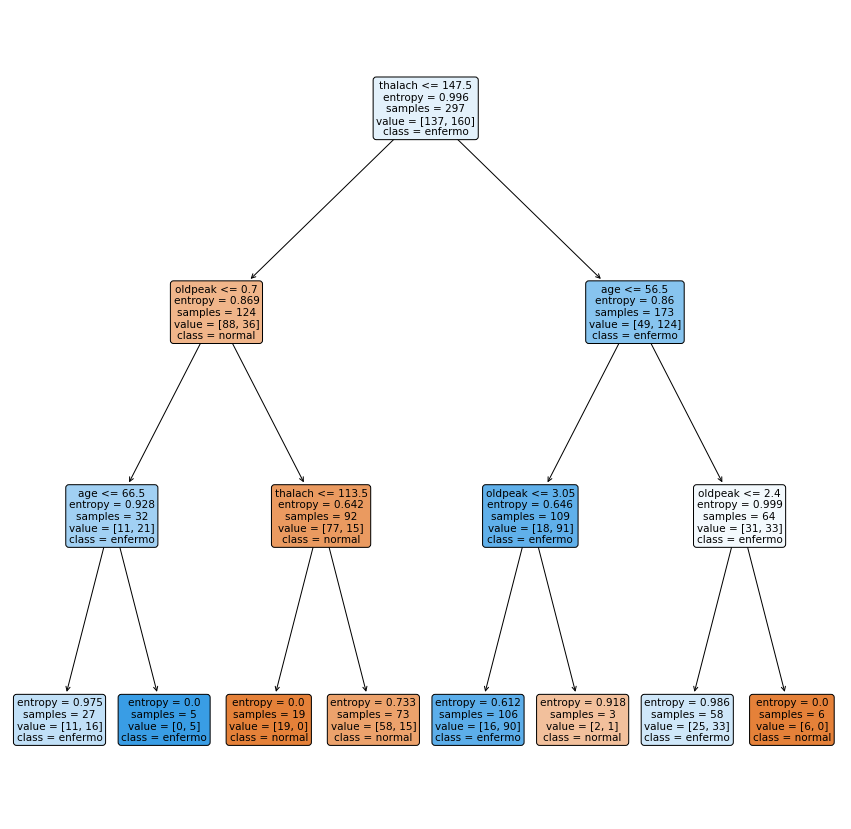

In [248]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=X3.keys() ,class_names=df3['target'].values, rounded=True)
plt.show()

#### Árbol con todas las variables incluidas categóricas

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
X = df.drop(['target'], axis=1)
Y = df['target']

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=RANDOM_STATE)
clf = clf.fit(X, Y)


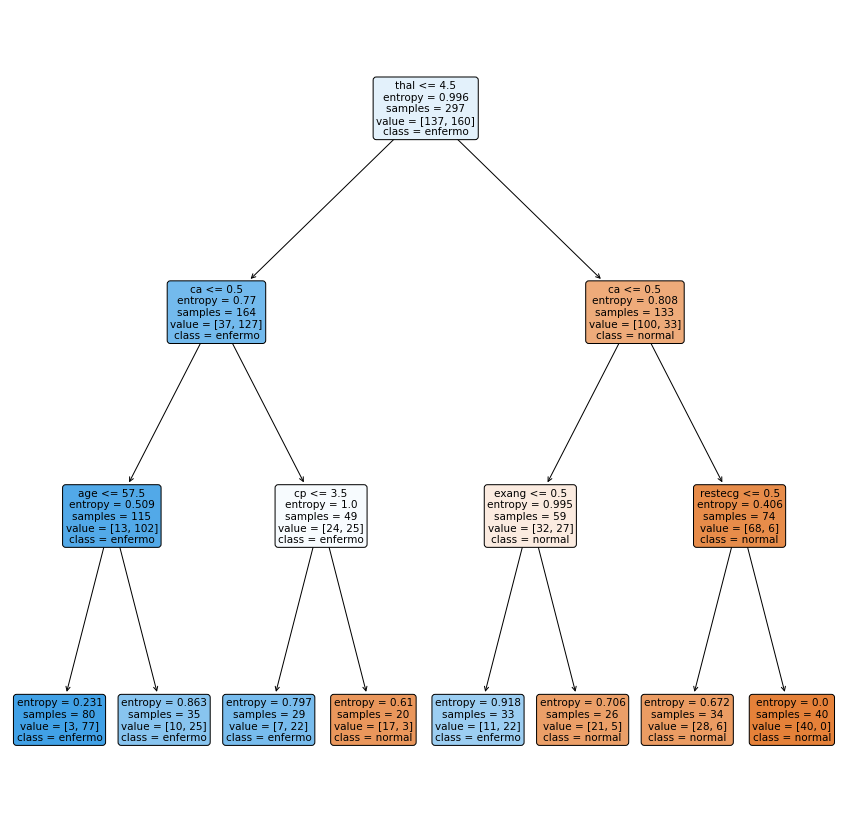

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=X.keys() ,class_names=df['target'].values, rounded=True)
plt.show()

### Análisis

En primer lugar aclarar que hemos construido dos árboles de decisión, uno únicamente utilizando las variables numéricas estudiadas y otro que incluye también las variables categóricas, para comparar resultados más tarde. 

#### Árbol con variables numéricas

- ¿Cuáles son las variables más importantes y en qué orden? 

Las variables más importantes son `thalach` (máximo ritmo cardiaco), `oldpeak` y `age` (edad), tal y como habiamos visto antes al observar los coeficientes de correlación

- ¿Hay variables del conjunto de datos que no se han usado? 

Las variables `trestbps` y `chol` no son usadas en el árbol de profundidad 3

- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 

76'4%

- ¿El árbol que hemos construido es capaz de separar las clases? 

Separa las clases pero no de una manera muy fiable.

- ¿En cuál de los nodos hoja existe mayor confusión?

Existe un nodo hoja con un valor de entropía 0.986 (un valor altísimo) que confunde 25 pacientes sanos.

## 4) Estudia el error de clasificación de este árbol 

Vamos a calcular la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol (3) y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

In [250]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, X3, Y3, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.6913722288262963
Exhaustividad ponderada media:  0.6832183908045977
F1 ponderado media:  0.6748068049356961


In [251]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, X, Y, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


### Análisis 

Hemos calculado los valores de precisión, exhaustividad y F1 para los dos árboles que hemos construido.

El primer árbol, que utilizaba únicamente las variables numéricas, nos ha mostrado valores de 69%, 68'3% y 67'4% respectivamente, lo que supone que la predicción no es del todo fiable aunque tenga valores positivos. Esto se debe a que las variables no eran del todo determinantes para predecir el valor objetivo (hemos visto coeficientes de correlación algo débiles)

En cambio, las variables categóricas eran algo más determinantes, puesto que el árbol construido con ellas ha ofrecido resultados para precisión, exhausitividad y F1 de 81%, 79% y 78% respectivamente, lo que supone una mejora que cumple mejor los requisitos

# --------------------------------------------------------------------

# Parte 3: Regresión

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos dado `airbnb.csv` en un dataframe. Describe el conjunto de datos y estudia la distribución de precios.

- `accommodates`: número máximo de personas permitido.
- `bathrooms` y `bedrooms`: baño y dormitorios.
- `guests_included`: inquilinos incluidos en el precio, por encima hay que pagas un extra.
- `host_listings_count`: número de establecimientos alquilados por el mismo propietario.
- `latitude`y `longitude`: situación geográfica.
- `minimum_nights`: mínimo número de noches que se pueden alquilar.
- `number_of_reviews`: números de comentarios en la plataforma de anteriores inquilinos.
- `distance_centre`: distancia al centro de la ciudad.
- `instant_bookable`: si se puede reservar directamente en la web.
- `entire_home`, `private_room` y `shared_room`: casa entera, habitación o habitación compartida.

In [12]:
import pandas as pd

df = pd.read_csv("airbnb.csv", sep=',')
#Eliminar filas en las que faltan valores usando dropna
df = df.dropna()

df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [13]:
df['price'].describe()

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64

Entre las variables que aparecen en el dataframe se encuentra el número de personas para las que está hecho el alojamiento, su número de baños, de dormitorios, si admite invitados, su posición respecto al centro de la ciudad... Son variables bastante relevates a la hora de establecer el precio para un alquiler.
Se puede observar que el máximo precio está en 19 euros la noche y el máximo en 440 euros, obteniendo un precio medio de 130 euros

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. 
Vamos a crear un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa). Será este dataframe el que utilizaremos después. 


In [14]:
correl=df.corr()
correl['price']

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

### Análisis

Las variables con mayor correlación con el precio (directa o inversa) son el número de dormitorios y el número de personas máximo en el alojamiento. Se puede observar que las variables menos determinantes son el mínimo de noches o si se permite reservar el alojamiento al instante.

In [15]:
#Variables con correlación menor a 0.2 (directa o inversa)
correl[abs(correl['price']) < 0.2]['price']

host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
instant_bookable      -0.004410
shared_room           -0.042109
Name: price, dtype: float64

In [16]:
#Nuevo dataframe
df2 = df.drop(['host_listings_count', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'instant_bookable', 'shared_room'], axis=1)
df2

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


In [33]:
# ANTES DE ENTRENAR LA RED VAMOS A ESCALAR LOS DATOS
from sklearn.preprocessing import MinMaxScaler

X = df2.drop(['price'], axis=1).values
Y = df2['price'].values

# Transformamos las variables de entrada
scaler_x = MinMaxScaler()
scaler_x.fit(X)
X_scaled=scaler_x.transform(X)

# Y también transformamos la variable de salida
scaler_y = MinMaxScaler()
scaler_y.fit(Y.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
Y_scaled=scaler_y.transform(Y.reshape(-1, 1))

## 3) Entrenamiento 

Crea una red neuronales de tipo Perceptrón Multicapa con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. 
Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).



In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, X_scaled, Y_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012723697054611205,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.01169437301714911,
  -0.01175465244045318],
 [0.0003885895981672428,
  0.0003546605235645444,
  0.0004269019094578842,
  0.00044308683145133766,
  0.00043602684046625774,
  0.00045943793468267077])

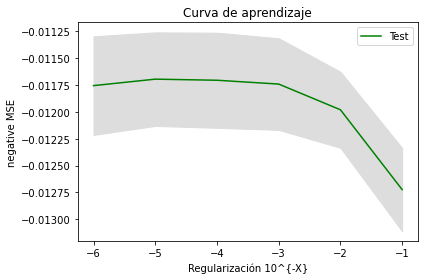

In [19]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Análisis

Se puede observar un comportamiento poco estable para el parámetro alpha. El valor más cercano a cero, y por tanto el mejor, es con $\alpha=10^{-5}$ (0.00001).

## 4) Medición del error

Con el modelo fijando el coeficiente de regulación decidido en el apartado anterior usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Dibuja un histograma con la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [20]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.00001
mlp = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, X_scaled, Y_scaled.ravel(), cv=10)



In [36]:
# desescalamos las predicciones para que estén en la escala original

predicts=scaler_y.inverse_transform(predicts_scaled.reshape(-1,1))
predicts=predicts.ravel()

In [37]:
errors = np.abs(df2.price - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df2['price'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 31.99620306888537
Desviación típica: 32.57804106883075
Error medio en %: 24.60294949008522


### Análisis 

El error medio y la desviación típica son bastante altos, de esta forma, podemos decir que el modelo es válido, pero no es suficientemente bueno

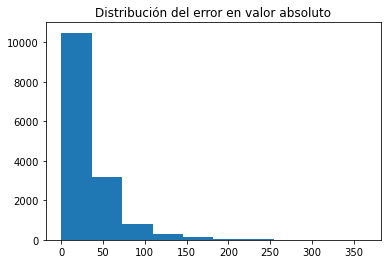

In [38]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

### Análisis

El modelo comete muchos más errores en los alojamientos de bajos precios. Esto se debe principalmente a que son los más abundantes y los hay de dirversas características, por lo que es difícil realizar una predicción precisa

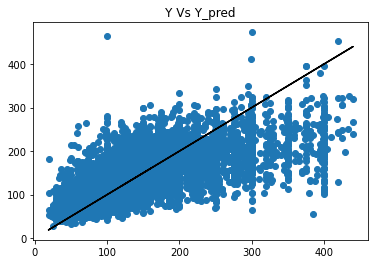

In [39]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df2.price, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df2.price, df2.price, color='k') 

plt.title('Y Vs Y_pred')
plt.show()